# pH Recognition

The goal is to predict the pH values given the RGB color code. The task can be viewed as a classification problem or a regression problem.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error
import cv2


In [2]:
pH = pd.read_csv('ph-data.csv.xls')
pH.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


Now we need to check the integrity of the data, to see if there is any NULL values.

In [3]:
pH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   blue    653 non-null    int64
 1   green   653 non-null    int64
 2   red     653 non-null    int64
 3   label   653 non-null    int64
dtypes: int64(4)
memory usage: 20.5 KB


The data seems to be complete and properly tabulated. Before feeding the data into machine learning models, we need to check if the data is balanced; otherwise, we need to consider stratified sampling.

<AxesSubplot:>

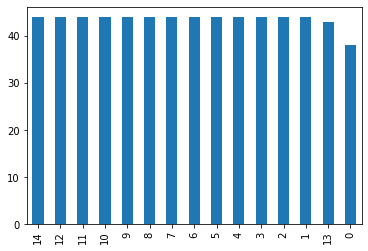

In [4]:
pH.label.value_counts().plot(kind='bar')

In general, the data looks balanced. We can split it into train set and test set.

In [5]:
X = pH[['red','green','blue']]
y = pH.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Classification Method

In [6]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
tree_model = RandomForestClassifier(n_estimators=50)
tree_model.fit(X_train,y_train)
tree_prd = tree_model.predict(X_test)
print(classification_report(tree_prd,y_test))
print('Mean squared error is {}'.format(mean_squared_error(tree_prd,y_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.91      0.83      0.87        12
           2       0.91      0.83      0.87        12
           3       0.60      0.75      0.67        12
           4       0.69      0.50      0.58        18
           5       0.69      0.60      0.64        15
           6       0.62      0.91      0.74        11
           7       0.78      0.54      0.64        13
           8       0.67      0.60      0.63        10
           9       0.69      0.92      0.79        12
          10       0.81      0.72      0.76        18
          11       0.65      1.00      0.79        11
          12       0.91      0.83      0.87        12
          13       0.64      0.64      0.64        11
          14       0.84      0.76      0.80        21

    accuracy                           0.74       196
   macro avg       0.75      0.76      0.75       196
weighted avg       0.76   

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 

log_model = LogisticRegression()
log_model.fit(X_train,y_train)
log_prd = log_model.predict(X_test)
print(classification_report(log_prd,y_test))
print('Mean squared error is {}'.format(mean_squared_error(log_prd,y_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.36      0.67      0.47         6
           2       0.64      0.39      0.48        18
           3       0.40      0.50      0.44        12
           4       0.38      0.38      0.38        13
           5       0.62      0.53      0.57        15
           6       0.06      0.33      0.11         3
           7       0.56      0.24      0.33        21
           8       0.67      0.55      0.60        11
           9       0.81      0.81      0.81        16
          10       0.75      0.80      0.77        15
          11       0.65      0.85      0.73        13
          12       0.73      0.62      0.67        13
          13       0.27      0.15      0.19        20
          14       0.16      0.30      0.21        10

    accuracy                           0.52       196
   macro avg       0.54      0.53      0.52       196
weighted avg       0.57   

Logistic regression performed much worse than RandomForest.

### Regression model

In [8]:
# Linear regression with regularization
from sklearn.linear_model import Ridge


ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
ridge_prd = ridge_model.predict(X_test)
print(classification_report(np.round(ridge_prd),y_test))
print('Mean squared error is {}'.format(mean_squared_error(ridge_prd,y_test)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         5
         2.0       0.73      0.31      0.43        26
         3.0       0.20      0.12      0.15        24
         4.0       0.46      0.35      0.40        17
         5.0       0.08      0.20      0.11         5
         6.0       0.19      0.33      0.24         9
         7.0       0.22      0.18      0.20        11
         8.0       0.11      0.11      0.11         9
         9.0       0.00      0.00      0.00        22
        10.0       0.00      0.00      0.00        18
        11.0       0.47      0.36      0.41        22
        12.0       0.36      0.21      0.27        19
        13.0       0.00      0.00      0.00         9
        14.0       0.00      0.00      0.00         0

    accuracy                           0.18       196
   macro avg       0.19      0.15      0.16       196
weighted avg       0.28   

Clearly, classification is a better option here.